# Exploration du dataset

## Import des premières librairies et exploration du fichier "train.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import cv2
import matplotlib.patches as patches

In [3]:
df = pd.read_csv('train.csv')
df.head(10)

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...
5,002be4f.jpg_Flower,1339279 519 1340679 519 1342079 519 1343479 51...
6,002be4f.jpg_Gravel,NaN
7,002be4f.jpg_Sugar,67495 350 68895 350 70295 350 71695 350 73095 ...
8,0031ae9.jpg_Fish,3510 690 4910 690 6310 690 7710 690 9110 690 1...
9,0031ae9.jpg_Flower,2047 703 3447 703 4847 703 6247 703 7647 703 9...


In [4]:
df.shape

(22184, 2)

On constate que notre dataframe est constitué de 2 colonnes.
La première contient le nom de chaque image concaténé avec les labels. Il y a donc 4 observations par image.
La seconde colonne contientles codes RLE pour déterminer un masque dans chaque image où une structure a été détectée.
La présence d'un Nan indique qu'il n'y a pas de structure nuageuse détectée.
22184 observations, 4 observations par image, on retrouve les 5546 images du train_set.

In [5]:
df.isnull().sum()

Image_Label          0
EncodedPixels    10348
dtype: int64

## Premières manipulations du dataset pour faciliter la visualisation

Dans un premier temps, séparation du nom des images et des labels puis renommage des colonnes

In [6]:
df1 = df['Image_Label'].str.split('_', expand = True)

In [7]:
dico = {0:'image', 1:'label'}
df1 = df1.rename(dico, axis = 1)
df1.head()

,image,label
0,0011165.jpg,Fish
1,0011165.jpg,Flower
2,0011165.jpg,Gravel
3,0011165.jpg,Sugar
4,002be4f.jpg,Fish


In [8]:
df1['EncodedPixels'] = df['EncodedPixels']
df1.head()

,image,label,EncodedPixels
0,0011165.jpg,Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg,Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg,Gravel,NaN
3,0011165.jpg,Sugar,NaN
4,002be4f.jpg,Fish,233813 878 235213 878 236613 878 238010 881 23...


In [9]:
df1['image'].value_counts()

db4030a.jpg    4
404f2ae.jpg    4
3b9a844.jpg    4
a0f699a.jpg    4
ce6fb99.jpg    4
              ..
400b812.jpg    4
1f9dc0a.jpg    4
c2d77ea.jpg    4
af408e8.jpg    4
3cc849a.jpg    4
Name: image, Length: 5546, dtype: int64

Ensuite, vérification de la quantité de chaque structure identifiée

In [10]:
fish = df1[ df1['label']=='Fish' ].EncodedPixels.count()
flower = df1[ df1['label']=='Flower' ].EncodedPixels.count()
gravel = df1[ df1['label']=='Gravel' ].EncodedPixels.count()
sugar = df1[ df1['label']=='Sugar' ].EncodedPixels.count()

In [11]:
print('Nbe Fish =', fish)
print('Nbe Flower', flower)
print('Nbe Gravel', gravel)
print('Nbe Sugar', sugar)

Nbe Fish = 2781
Nbe Flower 2365
Nbe Gravel 2939
Nbe Sugar 3751


Pour bien visualiser la répartition, création d'un diagramme

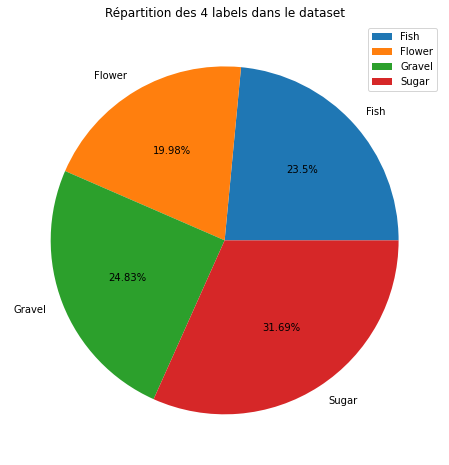

In [12]:
plt.figure(figsize = (8,8))
plt.pie(x = [fish, flower, gravel, sugar], labels = ['Fish', 'Flower', 'Gravel', 'Sugar'], autopct = lambda x: str(round(x,2))+'%')
plt.legend()
plt.title("Répartition des 4 labels dans le dataset")
plt.show();

Etant donné le nombre de structures détectées, il est clair qu'une image contient souvent plusieurs strucutres.
Cela va être vérifié par une opération de regroupement ("groupby") pour un décompte par image puis visualisation à l'aide d'un histogramme.

In [13]:
labels_par_image = df1.groupby('image')['EncodedPixels'].count()
labels_par_image

image
0011165.jpg    2
002be4f.jpg    3
0031ae9.jpg    3
0035239.jpg    2
003994e.jpg    3
              ..
ffcedf2.jpg    1
ffd11b6.jpg    2
ffd3dfb.jpg    1
ffd6680.jpg    2
ffea4f4.jpg    1
Name: EncodedPixels, Length: 5546, dtype: int64

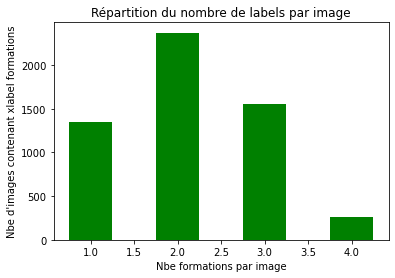

In [16]:
plt.hist(labels_par_image, bins = 4, range=(0.5,4.5), color = 'green', rwidth=0.5)
plt.title("Répartition du nombre de labels par image")
plt.xlabel('Nbe formations par image')
plt.ylabel("Nbe d'images contenant xlabel formations");

In [26]:
#z = labels_par_image.value_counts(sort = False)
#plt.bar([1,2,3,4], z, width = 0.5)

On constate qu'en majorité une image contient 2 structures nuageuses. Viennent ensuite les images avec 3 structures puis seulement une. Finalement, peu d'images contiennent les 4.

In [14]:
df1.head(12)

,image,label,EncodedPixels
0,0011165.jpg,Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg,Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg,Gravel,NaN
3,0011165.jpg,Sugar,NaN
4,002be4f.jpg,Fish,233813 878 235213 878 236613 878 238010 881 23...
5,002be4f.jpg,Flower,1339279 519 1340679 519 1342079 519 1343479 51...
6,002be4f.jpg,Gravel,NaN
7,002be4f.jpg,Sugar,67495 350 68895 350 70295 350 71695 350 73095 ...
8,0031ae9.jpg,Fish,3510 690 4910 690 6310 690 7710 690 9110 690 1...
9,0031ae9.jpg,Flower,2047 703 3447 703 4847 703 6247 703 7647 703 9...


La question que l'on peut maintenant se poser est de savoir s'il y a une corrélation entre ces différentes structures puisqu'en général, plusieurs sont présentes sur une même image. Pour cela, on va passer par une heatmap.

Il nous faut d'abord transformer nos labels en variables indicatrices.

In [15]:
corr_df = pd.get_dummies(df1, columns = ['label'])
corr_df['image'] = df1['image']
corr_df.head(12)

,image,EncodedPixels,label_Fish,label_Flower,label_Gravel,label_Sugar
0,0011165.jpg,264918 937 266318 937 267718 937 269118 937 27...,1,0,0,0
1,0011165.jpg,1355565 1002 1356965 1002 1358365 1002 1359765...,0,1,0,0
2,0011165.jpg,NaN,0,0,1,0
3,0011165.jpg,NaN,0,0,0,1
4,002be4f.jpg,233813 878 235213 878 236613 878 238010 881 23...,1,0,0,0
5,002be4f.jpg,1339279 519 1340679 519 1342079 519 1343479 51...,0,1,0,0
6,002be4f.jpg,NaN,0,0,1,0
7,002be4f.jpg,67495 350 68895 350 70295 350 71695 350 73095 ...,0,0,0,1
8,0031ae9.jpg,3510 690 4910 690 6310 690 7710 690 9110 690 1...,1,0,0,0
9,0031ae9.jpg,2047 703 3447 703 4847 703 6247 703 7647 703 9...,0,1,0,0


On constate que pour chaque image, les variables indicatrices sont à 1 pour chaque structure alors que la colonne 'EncodedPixels' nous informe qu'il n'y a pas de structure à certains moments.

In [16]:
corr_df[ 'EncodedPixels' ].isnull()

0        False
1        False
2         True
3         True
4        False
         ...  
22179     True
22180     True
22181    False
22182     True
22183     True
Name: EncodedPixels, Length: 22184, dtype: bool

Il s'agit maintenant, de s'assurer que chaque ligne contenant un Nan ne possède que des 0 dans les variables indicatrices pour préciser l'absence de telle ou telle strucutre dans l'image.

In [17]:
vars_indic = ['label_Fish', 'label_Flower', 'label_Gravel', 'label_Sugar']
#Recupération des index où il y a un Nan dans EncodedPixels
idx_repl = corr_df[ corr_df[ 'EncodedPixels' ].isnull() ].index
#Remplacement dans les vars indicatrices des 1 par 0 puisque pas de structures
corr_df.iloc[idx_repl] = corr_df.iloc[idx_repl].replace(1,0)
corr_df.head(12)

,image,EncodedPixels,label_Fish,label_Flower,label_Gravel,label_Sugar
0,0011165.jpg,264918 937 266318 937 267718 937 269118 937 27...,1,0,0,0
1,0011165.jpg,1355565 1002 1356965 1002 1358365 1002 1359765...,0,1,0,0
2,0011165.jpg,NaN,0,0,0,0
3,0011165.jpg,NaN,0,0,0,0
4,002be4f.jpg,233813 878 235213 878 236613 878 238010 881 23...,1,0,0,0
5,002be4f.jpg,1339279 519 1340679 519 1342079 519 1343479 51...,0,1,0,0
6,002be4f.jpg,NaN,0,0,0,0
7,002be4f.jpg,67495 350 68895 350 70295 350 71695 350 73095 ...,0,0,0,1
8,0031ae9.jpg,3510 690 4910 690 6310 690 7710 690 9110 690 1...,1,0,0,0
9,0031ae9.jpg,2047 703 3447 703 4847 703 6247 703 7647 703 9...,0,1,0,0


Reste une dernière étape où nous regroupons les informations par image. 
C'est-à-dire qu'aulieu d'avoir 4 observations par image, nous utilisons les indicatrices pour n'avoir plus qu'une seule observation par image.

In [18]:
corr_df1 = corr_df.groupby('image')[vars_indic].max()
corr_df1.head()

,label_Fish,label_Flower,label_Gravel,label_Sugar
image,,,,
0011165.jpg,1,1,0,0
002be4f.jpg,1,1,0,1
0031ae9.jpg,1,1,0,1
0035239.jpg,0,1,1,0
003994e.jpg,1,0,1,1


In [19]:
corr_df1.shape

(5546, 4)

Avec ce tableau, qui contient autant d'observations que d'images dans le train_set, nous pouvons regarder les différentes corrélations à l'aide d'une heatmap.

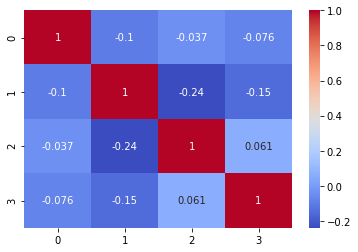

In [20]:
import seaborn as sns
#corr_val = corr_df1.value.T
sns.heatmap(np.corrcoef(corr_df1.values.T), cbar = True, annot = True, cmap = 'coolwarm');

D'après la heatmap, on constate qu'il n'y a pas de réelle corrélation entre les différentes strucutres...